<img src="http://www.ceic.org.ar/spanish/img/siisa-logo.jpg" align='right'>

# Evaluacion sobre cliente 127 (cartasur)
El cliente 131 responde al grafo y la politica evaluada es la numero 1 que tiene que ver con nuevos. Hago una analisis solo desde el 2018/07/22 hasta el 2019/05/22 porque son 10507 registros y sino el dump de sql explota.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Client_127_Policy_1_20180722_20190522.cvs", low_memory=False)

In [3]:
df.shape

(10507, 210)

In [4]:
df.head()

,executionId,executionDate,executionDateTime,policyId,policyVersion,decisionResult,apellidoNombre,cartasur_actividadLaboral,cartasur_antLaboralGral,cartasur_canal,...,veraz_observacionesConqui60m,veraz_observacionesMontoCerrada1m,veraz_observacionesMontoCerrada24m,veraz_peorSituacionBureau4m,veraz_peorSituacionBureau5a12m,veraz_peorStatus12,veraz_peorStatusActual,veraz_poblacion,veraz_score,veraz_validado
0,991686,23/07/2018,09:36,1,58,OK|7000|Codigo rol:26955590,HERRERA MARIEL EMPERATI,Empleada Domestica,1844.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,991688,23/07/2018,09:36,1,58,OK|6500|Codigo rol:26805606,BAREIRO MAXIMO RAMON,Monotribustista,35998.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,991690,23/07/2018,09:37,1,58,OK|8500|Codigo rol:26805606,BAREIRO MAXIMO RAMON,Tarjeta en otra Entidad,35998.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,991695,23/07/2018,09:37,1,58,OK|13000|Codigo rol:26955644,BENITEZ FIDENCIA,Jubilado,35998.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,991708,23/07/2018,09:41,1,58,RECHAZA|Score SIISA (775) entre 350 y 799 y S...,GOMEZ DELGADO NOELIA SOLEDAD,Cooperativista,3293.0,0,...,0.0,0.0,0.0,NaN,NaN,9.0,9.0,ok,174.0,False


In [5]:
# tienen toda la misma politica??
df.policyId.unique()

array([1], dtype=int64)

In [6]:
# creo una columna que solo me diga si rechazo o califica.
df['decision_filtered'] = df.decisionResult.str.split("|", n = 1, expand = True)[0]

RECHAZA         5074
OK              4951
ERROR            397
ESCALAMIENTO      85
Name: decision_filtered, dtype: int64

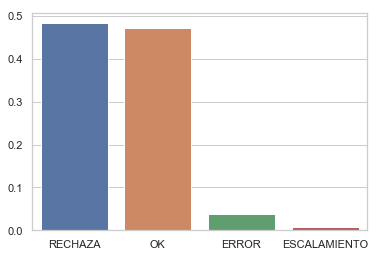

In [7]:
# Simplemente grafico la cantidad que pasa por califica o rechazo.
sns.set(style="whitegrid")
ax =sns.barplot(df.decision_filtered.value_counts().index, df.decision_filtered.value_counts().values/len(df.decision_filtered))
df.decision_filtered.value_counts()

In [8]:
# Genero una nueva columna que tiene que ver con si uso o no veraz por mas que este en dos puntos del arbol.
df['uso_veraz'] = pd.Series(np.repeat('NoUso', len(df.veraz_score)))

In [9]:
# Seteo las ocasiones en las que uso veraz.
df.loc[~df.veraz_score.isna(), 'uso_veraz'] = 'Uso'

In [10]:
# cuento la cantidad de veces que uso.
df.uso_veraz.value_counts()

NoUso    6574
Uso      3933
Name: uso_veraz, dtype: int64

In [11]:
# Tabla de contingencia class(califica/rechaza) / veraz (uso/noUsa) 
pd.crosstab(index=df.uso_veraz,
            columns=df.decision_filtered, margins=True)

decision_filtered,ERROR,ESCALAMIENTO,OK,RECHAZA,All
uso_veraz,,,,,
NoUso,397,45,3013,3119,6574
Uso,0,40,1938,1955,3933
All,397,85,4951,5074,10507


In [12]:
# No me interesa las instancias donde tengo ERROR o ESCALAMIENTO
df = df.drop(df[df.decision_filtered=='ERROR'].index)
df = df.drop(df[df.decision_filtered=='ESCALAMIENTO'].index)

In [13]:
# Tabla de contingencia class(califica/rechaza) / veraz (uso/noUsa) 
pd.crosstab(index=df.uso_veraz,
            columns=df.decision_filtered, margins=True)

decision_filtered,OK,RECHAZA,All
uso_veraz,,,
NoUso,3013,3119,6132
Uso,1938,1955,3893
All,4951,5074,10025


In [14]:
# Estrategia ahora es ver la correlacion de variables utilizadas por siisa y por veraz de modo tal de ver si alguna explica la
# otra.
df_con_veraz = df[df.uso_veraz=='Uso']
df_variables_select = df_con_veraz.filter(regex=r'(siisa*|veraz*)')


In [15]:
df_variables_select.shape

(3893, 117)

In [16]:
df_variables_select.drop(df_variables_select.select_dtypes(['object','bool']), inplace=True, axis=1)

C:\Users\elias\Programs\anaconda3\envs\siisa\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
# veo cuales variables tienen Nan.
df_variables_select.isna().sum()

siisa_bacCompromiso                      0
siisa_cant1s                             0
siisa_cant2s                             0
siisa_cant3s                             0
siisa_cant4s                             0
siisa_cant5s                             0
siisa_cant6s                             0
siisa_cantCheques                        0
siisa_cantMoras                          0
siisa_cantMorasBCRA                      0
siisa_consultasAno                       0
siisa_consultasDia                       0
siisa_consultasDosAno                    0
siisa_consultasMes                       0
siisa_consultasSeisMeses                 0
siisa_consultasSemana                    0
siisa_consultasTresMeses                 0
siisa_cuil                               0
siisa_Dup1                            3893
siisa_Dup2                            3893
siisa_Dup3                            3893
siisa_Dup4                            3893
siisa_DupCuil1                           0
siisa_DupCu

In [18]:
# me saco de encima las columnas que tienen toda la columna como Nan y ademas los scores que deberian correlacionar.
df_variables_select.drop(['siisa_Dup1','siisa_Dup2','siisa_Dup3','siisa_Dup4', 'veraz_peorSituacionBureau4m', 'veraz_peorSituacionBureau5a12m', 'siisa_cuil', 'veraz_cuit', 'veraz_score', 'siisa_score' ], axis=1, inplace=True)

In [19]:
df_variables_select.isna().sum()

siisa_bacCompromiso                   0
siisa_cant1s                          0
siisa_cant2s                          0
siisa_cant3s                          0
siisa_cant4s                          0
siisa_cant5s                          0
siisa_cant6s                          0
siisa_cantCheques                     0
siisa_cantMoras                       0
siisa_cantMorasBCRA                   0
siisa_consultasAno                    0
siisa_consultasDia                    0
siisa_consultasDosAno                 0
siisa_consultasMes                    0
siisa_consultasSeisMeses              0
siisa_consultasSemana                 0
siisa_consultasTresMeses              0
siisa_DupCuil1                        0
siisa_DupCuil2                        0
siisa_DupCuil3                        0
siisa_DupCuil4                        0
siisa_maxBCRA                         0
siisa_maxBCRA12m                      0
siisa_maxBCRA24m                      0
siisa_maxBCRA6m                       0


In [20]:
df_variables_select=df_variables_select.dropna()

In [21]:
def print_types(df):
    for x in df.columns:
        print(x,df[x].dtype)
print_types(df_variables_select)

siisa_bacCompromiso int64
siisa_cant1s int64
siisa_cant2s int64
siisa_cant3s int64
siisa_cant4s int64
siisa_cant5s int64
siisa_cant6s int64
siisa_cantCheques int64
siisa_cantMoras int64
siisa_cantMorasBCRA int64
siisa_consultasAno int64
siisa_consultasDia int64
siisa_consultasDosAno int64
siisa_consultasMes int64
siisa_consultasSeisMeses int64
siisa_consultasSemana int64
siisa_consultasTresMeses int64
siisa_DupCuil1 int64
siisa_DupCuil2 int64
siisa_DupCuil3 int64
siisa_DupCuil4 int64
siisa_maxBCRA int64
siisa_maxBCRA12m int64
siisa_maxBCRA24m int64
siisa_maxBCRA6m int64
siisa_monto1s int64
siisa_monto2s int64
siisa_monto3s int64
siisa_monto4s int64
siisa_monto5s int64
siisa_monto6s int64
siisa_montoMorasBCRA int64
siisa_nroDoc int64
siisa_operaYcumple int64
siisa_relDepCuit int64
siisa_relDepMeses int64
siisa_relDepTel float64
siisa_sesCat int64
siisa_sesModelo int64
veraz_cantCheq12 float64
veraz_cantConcursos60 float64
veraz_cantJuicios12 float64
veraz_cantMoraAbierta24 float64
veraz

In [22]:
corr=df_variables_select.corr()

In [26]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
a=get_top_abs_correlations(df_variables_select, 10000)
a=a.dropna()
a_filter=a[a.values > 0.5]
a_filter.to_csv('corr.csv', header=True)

Top Absolute Correlations


In [28]:
a_filter

siisa_consultasAno        siisa_consultasDosAno       0.894980
siisa_maxBCRA             siisa_maxBCRA6m             0.887514
siisa_monto2s             siisa_montoMorasBCRA        0.831252
siisa_consultasAno        siisa_consultasSeisMeses    0.811590
siisa_consultasSeisMeses  siisa_consultasTresMeses    0.795182
siisa_cant2s              siisa_cantMorasBCRA         0.774985
siisa_consultasMes        siisa_consultasSemana       0.767666
                          siisa_consultasTresMeses    0.746600
siisa_cant5s              siisa_monto5s               0.739193
siisa_cantMorasBCRA       siisa_maxBCRA               0.733766
siisa_maxBCRA12m          veraz_peorStatus12          0.732614
siisa_consultasAno        siisa_consultasTresMeses    0.728675
veraz_peorStatus12        veraz_peorStatusActual      0.716171
siisa_consultasDosAno     siisa_consultasSeisMeses    0.715194
siisa_monto5s             veraz_cantConcursos60       0.692935
siisa_maxBCRA             veraz_peorStatusActual      0